In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gtfparse import read_gtf
from matplotlib.lines import Line2D
import seaborn as sns

## Assignment of TT-seq reads to haplotypes

In [2]:
stats, names = [], []

for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    for replicate in ['rep1', 'rep2']:
        with open(f'/DATA/users/m.magnitov/hap_phen/TTseq/bam_assigned/{sample}_{replicate}.assignment.log', 'r') as f:
            stats.append([int(x.split('\t')[1]) for x in f.readlines()])
            names.append(sample + '_' + replicate)
            
stats = pd.DataFrame(stats, index = names, columns = ['bam_hap1', 'bam_hap2', 'bam_total', 'unassigned', 'hap1', 'hap2'])
stats

,bam_hap1,bam_hap2,bam_total,unassigned,hap1,hap2
NA12878_rep1,15440400,15440593,15496068,13409209,1047985,1038874
NA12878_rep2,18765599,18766402,18817043,16013559,1403262,1400222
NA18983_rep1,13005160,13006788,13052599,11516263,766798,769538
NA18983_rep2,18362195,18363519,18420303,16107591,1156557,1156155
HG01241_rep1,14376759,14377031,14450094,12000842,1222422,1226830
HG01241_rep2,15841631,15841472,15920770,13155042,1380280,1385448
HG02601_rep1,15848930,15855027,15922123,13734008,1101337,1086778
HG02601_rep2,15818438,15822587,15895783,13743299,1081908,1070576
HG03464_rep1,14793876,14797255,14875249,12216788,1337617,1320844
HG03464_rep2,17491224,17493864,17588275,14442028,1588383,1557864


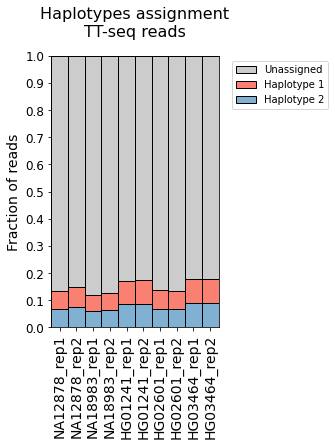

In [27]:
colors = ['#CCCCCC', '#FA8071', '#80B1D3']
labels = ['Unmapped and filtered by MAPQ', 'Duplicates', 'Final reads']

plt.figure(figsize = (3, 5))
plt.title('Haplotypes assignment\nTT-seq reads', fontsize = 16, y = 1.05)
for (i, sample_nums) in enumerate(stats.values):
    if i == 0:
        plt.bar(i, sample_nums[2]/sample_nums[2], color = colors[0], 
                width = 1, edgecolor = 'k', label = 'Unassigned')
        plt.bar(i, (sample_nums[4]+sample_nums[5])/sample_nums[2], color = colors[1], 
                width = 1, edgecolor = 'k', label = 'Haplotype 1')
        plt.bar(i, sample_nums[5]/sample_nums[2], color = colors[2], 
                width = 1, edgecolor = 'k', label = 'Haplotype 2')
    else:
        plt.bar(i, sample_nums[2]/sample_nums[2], color = colors[0], 
                width = 1, edgecolor = 'k')
        plt.bar(i, (sample_nums[4]+sample_nums[5])/sample_nums[2], color = colors[1], 
                width = 1, edgecolor = 'k')
        plt.bar(i, sample_nums[5]/sample_nums[2], color = colors[2], 
                width = 1, edgecolor = 'k')
        
plt.legend(bbox_to_anchor = (1.05, 1), fontsize = 10)
plt.xticks(np.arange(len(stats)), stats.index, rotation = 90, fontsize = 14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 12)
plt.ylabel('Fraction of reads', fontsize = 14)
plt.xlim((-0.5, len(stats) -0.5))
plt.ylim((0, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_assigned_ttseq_reads.pdf', bbox_inches = 'tight')
plt.show()

## PCA of TT-seq gene counts

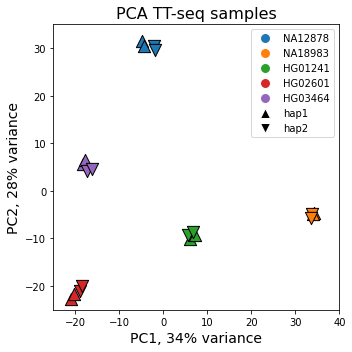

In [8]:
colors = {'NA12878': 'C0', 'NA18983': 'C1', 'HG01241': 'C2', 'HG02601': 'C3', 'HG03464': 'C4'}

pca_data = pd.read_csv('/DATA/users/m.magnitov/hap_phen/TTseq/ase/pca_all_allelic.txt', skiprows = 1, sep = '\s+')
pca_data['PC2'] = (-1)*pca_data['PC2']
pca_data['sample'] = [x.split('_')[0] for x in pca_data['name'].values]
with open('/DATA/users/m.magnitov/hap_phen/TTseq/ase/pca_all_allelic.txt') as f:
    pca_data_variance_explained = f.readlines()[0].rstrip('\n')
    
plt.figure(figsize = (5, 5))
plt.title('PCA TT-seq samples', fontsize = 16)
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    plt.scatter(pca_data[pca_data['sample'] == sample]['PC1'],
                pca_data[pca_data['sample'] == sample]['PC2'], 
                color = colors[sample], edgecolor = 'k', alpha = 0, label = sample)
    plt.scatter(pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 1)]['PC1'],
                pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 1)]['PC2'],
                marker = '^', color = colors[sample], edgecolor = 'k', s = 150, label = 'hap1')
    plt.scatter(pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 2)]['PC1'],
                pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 2)]['PC2'],
                marker = 'v', color = colors[sample], edgecolor = 'k', s = 150)
plt.xlabel(f"PC1, {pca_data_variance_explained.split(',')[0].split('=')[1]}% variance", fontsize = 14)
plt.ylabel(f"PC2, {pca_data_variance_explained.split(',')[1].split('=')[1]}% variance", fontsize = 14)
plt.xlim((-25, 40))
plt.ylim((-25, 35))
custom_lines = [Line2D([0], [0], marker='o', color='w', label='NA12878', markerfacecolor='C0', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='NA18983', markerfacecolor='C1', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG01241', markerfacecolor='C2', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG02601', markerfacecolor='C3', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG03464', markerfacecolor='C4', markersize=10),
                Line2D([0], [0], marker='^', color='w', label='hap1', markerfacecolor='k', markersize=10),
                Line2D([0], [0], marker='v', color='w', label='hap2', markerfacecolor='k', markersize=10)]
plt.legend(handles = custom_lines, fontsize = 10)
plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_pca_ttseq.pdf', bbox_inches = 'tight')
plt.show()

## Allele-specific TT-seq expression

In [4]:
genes = read_gtf('/DATA/users/m.magnitov/genomes/gencode.v42.basic.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


In [10]:
ase_auto, ase_chrX, balanced_auto, balanced_chrX = [], [], [], []
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['gene_id'] = deseq_res.index
    deseq_res = deseq_res.merge(genes, on = 'gene_id')

    ase = deseq_res[(deseq_res['padj'] < 0.1) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['gene_id'].isin(ase['gene_id'].values)]
    
    ase[['seqname', 'start', 'end', 'strand', 'gene_type', 'gene_name', 'gene_id', 'baseMean', 'log2FoldChange', 'padj']].to_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/{sample}_allele_specific.bed', sep = '\t', header = 0, index = 0)
    balanced[['seqname', 'start', 'end', 'strand', 'gene_type', 'gene_name', 'gene_id', 'baseMean', 'log2FoldChange', 'padj']].to_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/{sample}_balanced.bed', sep = '\t', header = 0, index = 0)
    
    ase_auto.append(len(ase[ase['seqname'] != 'chrX']))
    ase_chrX.append(len(ase[ase['seqname'] == 'chrX']))
    balanced_auto.append(len(balanced[balanced['seqname'] != 'chrX']))
    balanced_chrX.append(len(balanced[balanced['seqname'] == 'chrX']))

ase_table = pd.DataFrame([ase_auto, ase_chrX, balanced_auto, balanced_chrX]).transpose()
ase_table.index = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']
ase_table.columns = ['ASE autosomes', 'ASE chrX', 'Balanced autosomes', 'Balanced chrX']
ase_table

,ASE autosomes,ASE chrX,Balanced autosomes,Balanced chrX
NA12878,282,199,11389,83
NA18983,338,0,10070,0
HG01241,463,0,12102,0
HG02601,362,147,11000,97
HG03464,601,260,12359,90


In [10]:
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['gene_id'] = deseq_res.index
    deseq_res = deseq_res.merge(genes, on = 'gene_id')

    ase = deseq_res[(deseq_res['padj'] < 0.1) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['gene_id'].isin(ase['gene_id'].values)]
    
    ase = ase[['seqname', 'start', 'end', 'strand', 'gene_type', 'gene_name', 'gene_id', 'baseMean', 'log2FoldChange', 'padj']]
    ase['event'] = ['allele-specific']*len(ase)
    #ase.to_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/{sample}_allele_specific.txt', sep = '\t', header = 1, index = 0)
    balanced = balanced[['seqname', 'start', 'end', 'strand', 'gene_type', 'gene_name', 'gene_id', 'baseMean', 'log2FoldChange', 'padj']]
    balanced['event'] = ['balanced']*len(balanced)
    #balanced.to_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/{sample}_balanced.txt', sep = '\t', header = 1, index = 0)
    
    deseq_res = pd.concat([ase, balanced]).sort_values('padj')
    deseq_res.to_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/table_ase_genes_{sample}.tsv', sep = '\t', header = 1, index = 0)

## Volcano plots

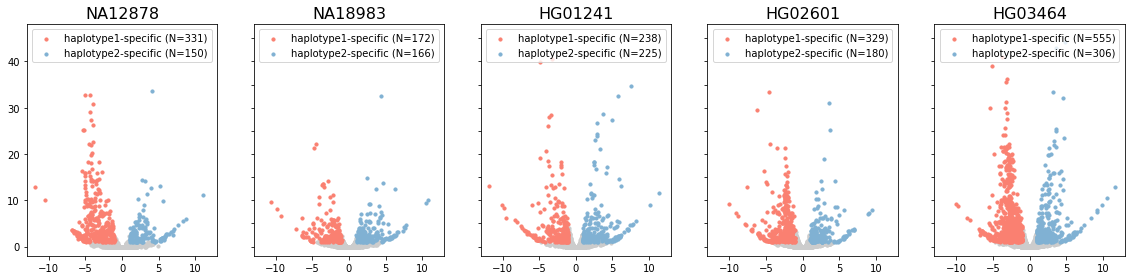

In [28]:
plt.figure(figsize = (16, 4))

for (i, sample) in enumerate(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']):
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/ase_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['gene_id'] = deseq_res.index
    deseq_res = deseq_res.merge(genes, on = 'gene_id')
    ase = deseq_res[(deseq_res['padj'] < 0.1) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['gene_id'].isin(ase['gene_id'].values)]
    
    plt.subplot(1, 5, i+1)
    plt.title(sample, fontsize = 16)
    plt.scatter(balanced['log2FoldChange'], -np.log10(balanced['padj']), color = '#CCCCCC', s = 10)
    plt.scatter(ase[ase['log2FoldChange'] < 0]['log2FoldChange'], 
                -np.log10(ase[ase['log2FoldChange'] < 0]['padj']), color = '#FA8071', s = 10,
                label = f"haplotype1-specific (N={str(len(ase[ase['log2FoldChange'] < 0]['log2FoldChange']))})")
    plt.scatter(ase[ase['log2FoldChange'] > 0]['log2FoldChange'], 
                -np.log10(ase[ase['log2FoldChange'] > 0]['padj']), color = '#80B1D3', s = 10,
                label = f"haplotype2-specific (N={str(len(ase[ase['log2FoldChange'] > 0]['log2FoldChange']))})")
    plt.legend(loc = 'upper center')
    if i != 0:
        plt.yticks(np.arange(0, 50, 5), [])
    plt.xlim((-13, 13))
    plt.ylim((-2, 48))
    
plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_volcanos_ttseq.pdf', bbox_inches = 'tight')
plt.show()

## ASE on chrX

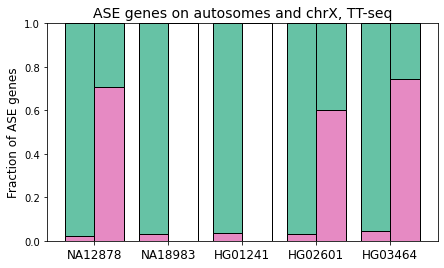

In [35]:
plt.figure(figsize = (7, 4))
plt.title('ASE genes on autosomes and chrX, TT-seq', fontsize = 14)
for (i, sample) in enumerate(ase_table.index):
    sample_ase_counts = ase_table.loc[sample].values
    
    plt.bar([i-0.2, i-0.2], [1, sample_ase_counts[0]/(sample_ase_counts[0]+sample_ase_counts[2])], 
            width = 0.4, color = ['#66C2A5', '#E68AC3'], edgecolor = 'k')
    if sample in ['NA18983', 'HG01241']:
        plt.bar([i+0.2], [1], width = 0.4, color = ['w'], edgecolor = 'k')
    else:
        plt.bar([i+0.2, i+0.2], [1, sample_ase_counts[1]/(sample_ase_counts[1]+sample_ase_counts[3])], 
                width = 0.4, color = ['#66C2A5', '#E68AC3'], edgecolor = 'k')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 12)
plt.ylabel('Fraction of ASE genes', fontsize = 12)
plt.ylim((0, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_fraction_chrX_ttseq.pdf', bbox_inches = 'tight')
plt.show()

## DEGs between samples

In [30]:
degs, non_degs = [], []

genes = read_gtf('/DATA/users/m.magnitov/genomes/gencode.v42.basic.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]

samples = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']

for i in range(0, len(samples)):
    for j in range(i, len(samples)):
        if samples[i] == samples[j]:
            degs.append(0)
            non_degs.append(0)
        else:
            deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/TTseq/ase/degs_{samples[j]}_{samples[i]}.csv', sep = '\s+', header = 0)
            deseq_res['gene_id'] = deseq_res.index
            deseq_res = deseq_res.merge(genes, on = 'gene_id')

            degs_sample = deseq_res[(deseq_res['padj'] < 0.1) & (abs(deseq_res['log2FoldChange']) > 1)]
            non_degs_sample = deseq_res[~deseq_res['gene_id'].isin(degs_sample['gene_id'].values)]

            degs.append(len(degs_sample))
            non_degs.append(len(non_degs_sample))

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


In [31]:
degs = pd.DataFrame([degs[:5], [0] + degs[5:9], [0, 0] + degs[9:12], [0, 0, 0] + degs[12:14], [0, 0, 0, 0] + [degs[14]]])
degs = pd.DataFrame(np.array(degs).transpose()+np.array(degs))

degs.iloc[0,0]=np.sum(ase_table[['ASE autosomes', 'ASE chrX']].values[0])
degs.iloc[1,1]=np.sum(ase_table[['ASE autosomes', 'ASE chrX']].values[1])
degs.iloc[2,2]=np.sum(ase_table[['ASE autosomes', 'ASE chrX']].values[2])
degs.iloc[3,3]=np.sum(ase_table[['ASE autosomes', 'ASE chrX']].values[3])
degs.iloc[4,4]=np.sum(ase_table[['ASE autosomes', 'ASE chrX']].values[4])

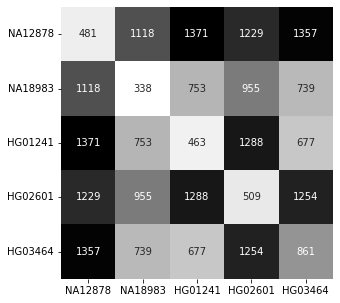

In [34]:
plt.figure(figsize = (5, 5))
sns.heatmap(degs, square = True, annot = True, fmt = 'g', cbar = 0, cmap = 'Greys')
plt.xticks(np.arange(5)+0.5, samples)
plt.yticks(np.arange(5)+0.5, samples, rotation = 0)
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_ttseq_heatmap_genes.pdf', bbox_inches = 'tight')
plt.show()